<a href="https://colab.research.google.com/github/Acme94/Data-Analyst-Test-Case-2/blob/main/DS_interview_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Анализ и обработка данных



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
import warnings
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.datasets import load_diabetes

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [ ]:
# Загрузим датасет
medical = load_diabetes()

In [ ]:
# Посмотрим его описание
print(medical.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# Загрузим фичи для анализа
df = pd.DataFrame(medical.data,columns = medical.feature_names)

# Добавим целевую переменную - показатель здоровья
df["health_status"] = medical.target

# Переведем загловки столбцов в нижний регистр и посмотрим на данные
df.columns = map(str.lower, df.columns)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,health_status
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df.loc['age']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,health_status
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [ ]:
df[['age','sex']]

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642
...,...,...
437,0.041708,0.050680
438,-0.005515,0.050680
439,0.041708,0.050680
440,-0.045472,-0.044642


In [ ]:
df.loc[:5,['age','sex']]

,age,sex
0,0.038076,0.050680
1,-0.001882,-0.044642
2,0.085299,0.050680
3,-0.089063,-0.044642
4,0.005383,-0.044642
5,-0.092695,-0.044642


# **Знакомство с датасетом**
Для начала выведите размер датасета (количество строк и столбцов)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            442 non-null    float64
 1   sex            442 non-null    float64
 2   bmi            442 non-null    float64
 3   bp             442 non-null    float64
 4   s1             442 non-null    float64
 5   s2             442 non-null    float64
 6   s3             442 non-null    float64
 7   s4             442 non-null    float64
 8   s5             442 non-null    float64
 9   s6             442 non-null    float64
 10  health_status  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## **Задание 1**
Рассчитайте среднее значение, медиану и 99 перцентиль показателя прогресса заболевания health_status. 


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,health_status
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
df.health_status.median()

140.5

In [ ]:
np.percentile(df.health_status,99)

319.3599999999999

# **Задание 2**
Постройте гистограмму распределения показателя health_status с количеством бинов = 100. Что можно сказать о форме распределения?

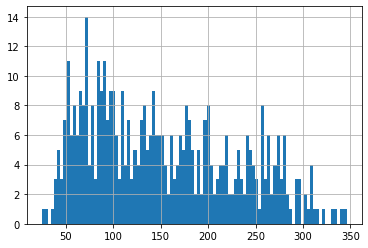

In [ ]:
df.health_status.hist(bins=100)


# **Задание 3**
Рассчитайте среднее значение кровяного давления (bp) для пациентов с прогрессом заболевания health_status >= 99 перцентиля и менее 99 перцентиля. Какой вывод можно сделать?

In [ ]:
df[df.health_status >= np.percentile(df.health_status,99)].bp.mean()

0.030823818798670122

In [ ]:
df[df.health_status < np.percentile(df.health_status,99)].bp.mean()

-0.00035267527229586743

In [ ]:
df.bp.mean()

1.2816545210746291e-16

# **Задание 4**
Постройте корреляционную матрицу признаков. Какой их них больше всего связан с heath_status? Какие выводы в целом можно сделать по полученным коэффициентам?

In [ ]:
import seaborn as sns

In [ ]:
corr_m = df.corr()

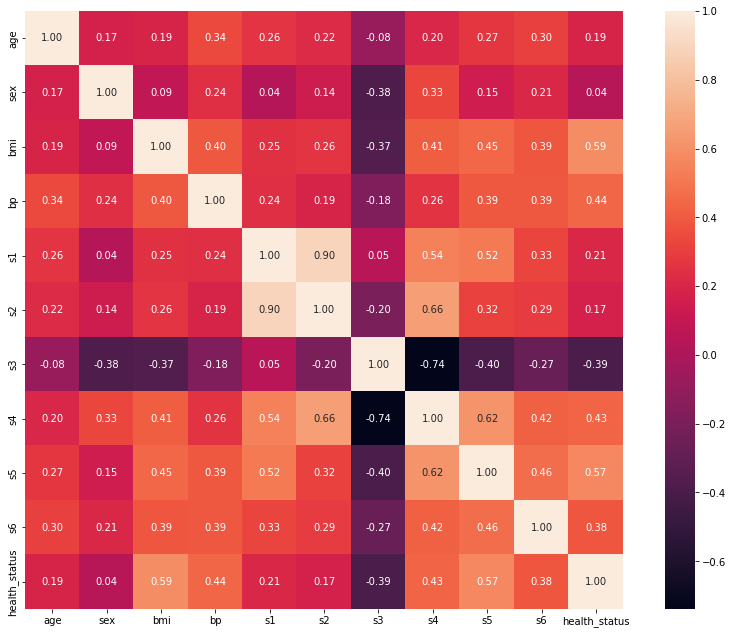

In [ ]:
plt.figure(figsize=(15, 11))
sns.heatmap(corr_m, annot=True, square = True, fmt='.2f')
plt.show()